# Importing Libraries
### (even those I have no idea that I would use them or not 😅)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading dataset from the link given

#### About Dataset
This week's data is all about passwords. Data is sourced from [Information is Beautiful.](https://docs.google.com/spreadsheets/d/1cz7TDhm0ebVpySqbTvrHrD3WpxeyE4hLZtifWSnoNTQ/edit#gid=21)
There's lots of additional information about password quality & strength in the source [Doc](https://docs.google.com/spreadsheets/d/1cz7TDhm0ebVpySqbTvrHrD3WpxeyE4hLZtifWSnoNTQ/edit#gid=21). Please note that the "strength" column in this dataset is relative to these common aka "bad" passwords and YOU SHOULDN'T USE ANY OF THEM!


|variable          |class     |description |
|:-----------------|:---------|:-----------|
|rank              |double    | popularity in their database of released passwords |
|password          |character | Actual text of the password |
|category          |character | What category does the password fall in to?|
|value             |double    | Time to crack by online guessing |
|time_unit         |character | Time unit to match with value |
|offline_crack_sec |double    | Time to crack offline in seconds |
|rank_alt          |double    | Rank 2 |
|strength          |double    | Strength = quality of password where 10 is highest, 1 is lowest, please note that these are relative to these generally bad passwords |
|font_size         |double    | Used to create the graphic for KIB |

# Reading the dataset and looking at the tail (oh that's your first time not seeing head after reading dataset)

#### There are some null values so we need to trim the rows.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-14/passwords.csv')
df.tail(8)

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
499,500.0,passw0rd,password-related,92.27,years,29.02,502.0,28.0,21.0
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.iloc[:-7]
df.tail(8)

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
492,493.0,chance,name,3.72,days,0.00321,495.0,7.0,11.0
493,494.0,genesis,nerdy-pop,3.19,months,0.08350,496.0,7.0,11.0
494,495.0,hotrod,cool-macho,3.72,days,0.00321,497.0,7.0,11.0
495,496.0,reddog,cool-macho,3.72,days,0.00321,498.0,6.0,10.0
496,497.0,alexande,name,6.91,years,2.17000,499.0,9.0,12.0
497,498.0,college,nerdy-pop,3.19,months,0.08350,500.0,7.0,11.0
498,499.0,jester,name,3.72,days,0.00321,501.0,7.0,11.0
499,500.0,passw0rd,password-related,92.27,years,29.02000,502.0,28.0,21.0


# Plotting the famous categories and their popularity

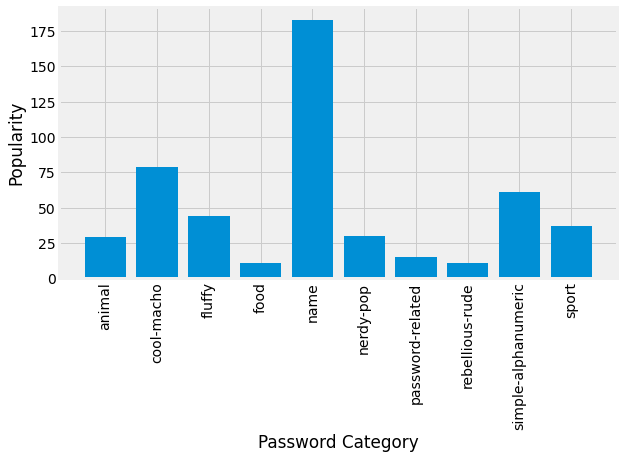

In [5]:
famous_category = df.groupby('category')['category'].count()

# setting a larger plot size
plt.figure(figsize=(10,5))
# using a different style
plt.style.use("fivethirtyeight")
# plotting chart
plt.bar(famous_category.index,famous_category.values)
# rotating the x labels because they are loooooong
plt.xticks(rotation=90)
# setting the title so that peasents can know what's going on
plt.xlabel("Password Category")
# same as above
plt.ylabel("Popularity")
# atually displaying the chart
plt.show()

# Now ploting which category has the most strength.

###### But before that

In [6]:
# th 14 in the nerdy-pop mean indicates that there are some values more than 10 which is not right.
df.groupby('category')['strength'].mean()

category
animal                  7.551724
cool-macho              7.215190
fluffy                  6.772727
food                    4.363636
name                    7.191257
nerdy-pop              14.000000
password-related        7.866667
rebellious-rude         6.727273
simple-alphanumeric     5.852459
sport                   8.000000
Name: strength, dtype: float64

In [7]:
# Now displaying how many rows does have strength more than 10
df[df['strength']>10]

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
12,13.0,abc123,simple-alphanumeric,3.70,weeks,0.022400,13.0,32.0,23.0
25,26.0,trustno1,simple-alphanumeric,92.27,years,29.020000,26.0,25.0,20.0
148,149.0,ncc1701,nerdy-pop,2.56,years,0.806000,149.0,46.0,27.0
196,197.0,thx1138,nerdy-pop,2.56,years,0.806000,198.0,46.0,27.0
273,274.0,8675309,nerdy-pop,3.09,hours,0.000111,275.0,19.0,17.0
320,321.0,bond007,nerdy-pop,2.56,years,0.806000,322.0,38.0,25.0
335,336.0,rush2112,nerdy-pop,92.27,years,29.020000,337.0,48.0,28.0
343,344.0,red123,simple-alphanumeric,3.70,weeks,0.022400,345.0,35.0,24.0
358,359.0,ou812,nerdy-pop,17.28,hours,0.000622,360.0,36.0,24.0
394,395.0,heka6w2,simple-alphanumeric,2.56,years,0.806000,396.0,36.0,24.0


#### We can just easily remove them because thye are just 15. Every output being smaller than 10 shows that we have removed the outliers

In [8]:
df = df[df['strength'] <= 10]
df.groupby(['category'])['strength'].mean()

category
animal                 7.551724
cool-macho             7.215190
fluffy                 6.772727
food                   4.363636
name                   7.191257
nerdy-pop              7.791667
password-related       6.428571
rebellious-rude        6.727273
simple-alphanumeric    2.592593
sport                  7.277778
Name: strength, dtype: float64

In [9]:
# removing columns that won't be helpful
df.drop(columns = ['rank_alt','font_size'],inplace=True)

# Which category has the most strength

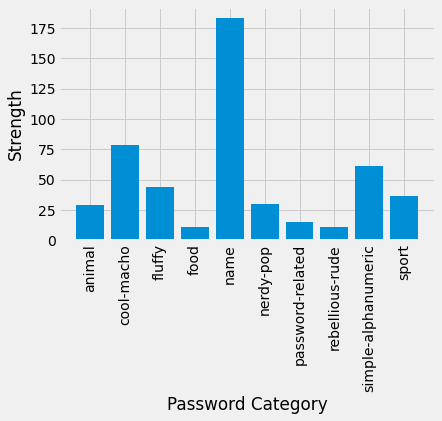

In [10]:
string_category_category = df.groupby('category')['strength'].mean()
# plotting chart
plt.bar(famous_category.index,famous_category.values)
# rotating the x labels because they are loooooong
plt.xticks(rotation=90)
# setting the title so that peasents can know what's going on
plt.xlabel("Password Category")
# same as above
plt.ylabel("Strength")
# atually displaying the chart
plt.show()

### Does only the passwords **length** makes a stronge password? 

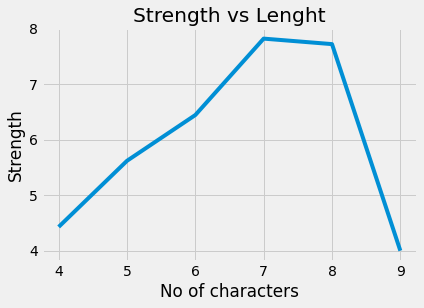

In [11]:
df['chars'] = df['password'].apply(lambda x:len(list(x)))

chars_stren = df.groupby('chars')['strength'].mean()
plt.plot(chars_stren.index, chars_stren.values)
plt.xlabel("No of characters")
plt.ylabel("Strength")
plt.title("Strength vs Lenght")
plt.show()

### Probably not. What what password has a length of 9 but strength of almost 0??

In [12]:
df[df['chars'] == 9]

,rank,password,category,value,time_unit,offline_crack_sec,strength,chars
48,49.0,123456789,simple-alphanumeric,1.84,weeks,0.0111,4.0,9
